In [2]:
%pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('fertilizer.csv')

In [5]:
data

,Crop,N,P,K,pH
0,Wheat,120,30,60,6.00
1,Wheat,120,30,60,6.50
2,Wheat,120,30,60,7.00
3,Rice,80,40,40,5.50
4,Barley(JAV),70,40,45,5.50
...,...,...,...,...,...
207,Lentils(Masoor Dal),20,60,20,5.32
208,Potato,180,60,90,4.82
209,Cotton,120,40,20,5.32
210,Jute,80,40,40,5.32


In [6]:
data['Crop'].value_counts()

Rice                     19
Barley(JAV)              19
Maize                    19
Chickpeas(Channa)        19
Kidney beans             19
pigeon peas(Toor Dal)    19
Lentils(Masoor Dal)      19
Potato                   19
Cotton                   19
Jute                     19
Coffee                   19
Wheat                     3
Name: Crop, dtype: int64

In [7]:
mask = data['Crop']=='Barley(JAV)'
data = data[~mask]


In [8]:
# renaming crops

data.loc[data['Crop']=='Rice', 'Crop'] = 'rice'
data.loc[data['Crop']=='Maize', 'Crop'] = 'maize'
data.loc[data['Crop']=='Chickpeas(Channa)', 'Crop'] = 'chickpeas'
data.loc[data['Crop']=='Kidney beans', 'Crop'] = 'kidney_bean'
data.loc[data['Crop']=='pigeon peas(Toor Dal)', 'Crop'] = 'pigeon_peas'
data.loc[data['Crop']=='Lentils(Masoor Dal)', 'Crop'] = 'lentil'
data.loc[data['Crop']=='Potato', 'Crop'] = 'potato'
data.loc[data['Crop']=='Cotton', 'Crop'] = 'cotton'
data.loc[data['Crop']=='Jute', 'Crop'] = 'jute'
data.loc[data['Crop']=='Coffee', 'Crop'] = 'coffee'
data.loc[data['Crop']=='Wheat', 'Crop'] = 'wheat'


In [9]:
data['Crop'].unique()

array(['wheat', 'rice', 'maize', 'chickpeas', 'kidney_bean',
       'pigeon_peas', 'lentil', 'potato', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
x = data[['N','P','K','pH']]
y = data['Crop']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size= 0.2, random_state=2)

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 20, random_state=2)
forest.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=20, random_state=2)

In [12]:
y_pred = forest.predict(xtest)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)  

0.5384615384615384

In [14]:
# example prediction
a= {}
a['N'] = 80
a['P'] = 60
a['K'] = 60
a['pH'] = 5.5
df = pd.DataFrame(a, columns=['N','P','K','pH'], index=[0])
df

,N,P,K,pH
0,80,60,60,5.5


In [17]:
predicted_crop = forest.predict(df)[0]
predicted_crop

'jute'

In [21]:
# change crops categorical value into separate columns with respective crop name
dummies = pd.get_dummies(data['Crop'])
data = data.join(dummies)
data.drop(['Crop'], axis=1)

,N,P,K,pH,chickpeas,coffee,cotton,jute,kidney_bean,lentil,maize,pigeon_peas,potato,rice,wheat
0,120,30,60,6.00,0,0,0,0,0,0,0,0,0,0,1
1,120,30,60,6.50,0,0,0,0,0,0,0,0,0,0,1
2,120,30,60,7.00,0,0,0,0,0,0,0,0,0,0,1
3,80,40,40,5.50,0,0,0,0,0,0,0,0,0,1,0
5,80,40,20,5.50,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,20,60,20,5.32,0,0,0,0,0,1,0,0,0,0,0
208,180,60,90,4.82,0,0,0,0,0,0,0,0,1,0,0
209,120,40,20,5.32,0,0,1,0,0,0,0,0,0,0,0
210,80,40,40,5.32,0,0,0,1,0,0,0,0,0,0,0


<ipython-input-22-f721971ee67d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="PiYG")


<AxesSubplot:>

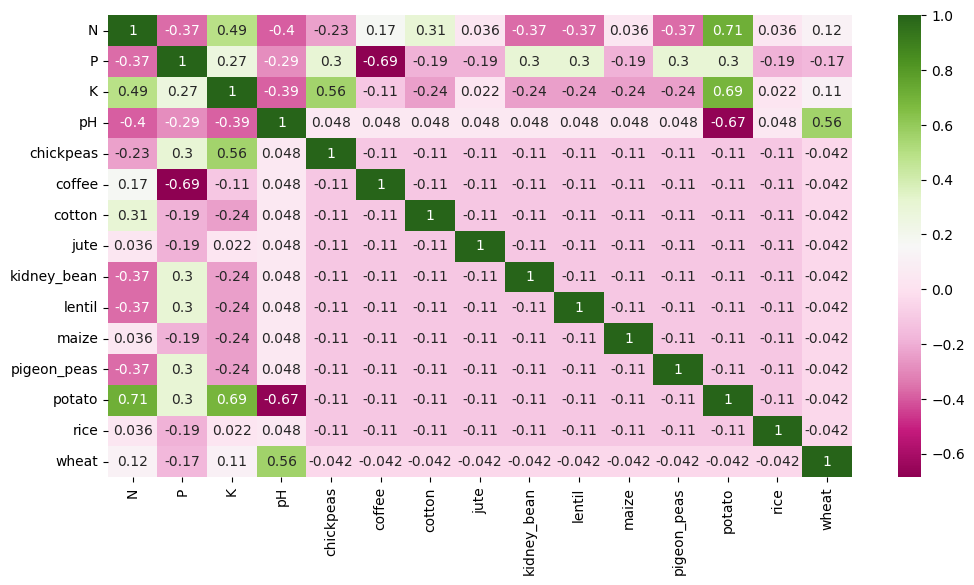

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap="PiYG")

In [23]:
data['N_p_k'] = data['N'] / (data['N']+data['P']+data['K'])
data['n_P_k'] = data['P'] / (data['N']+data['P']+data['K'])
data['n_p_K'] = data['K'] / (data['N']+data['P']+data['K'])


<ipython-input-24-d3c15cef6ae6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="PiYG")


<AxesSubplot:>

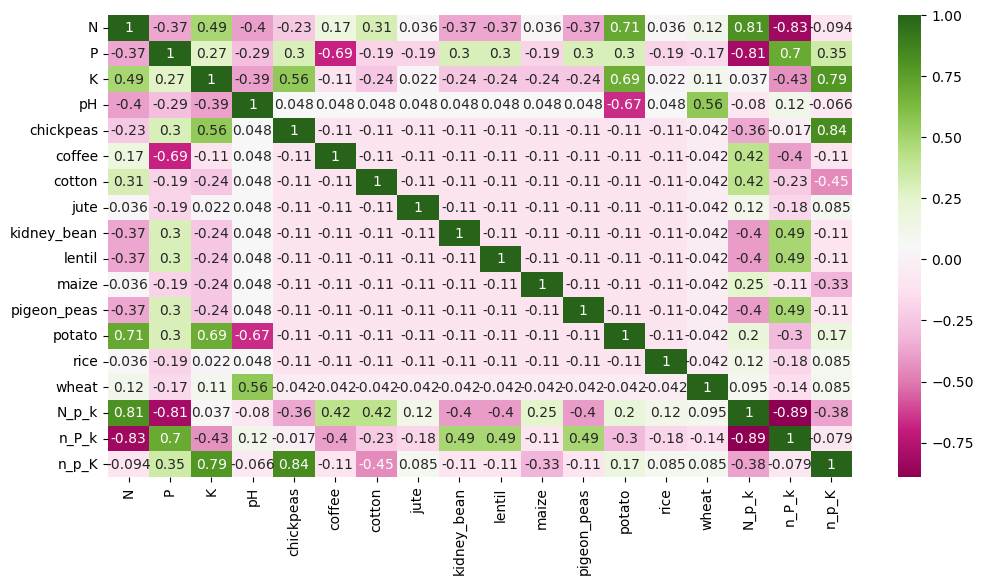

In [24]:
# The correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap="PiYG")

In [25]:
x = data[['N','P','K','pH','N_p_k','n_P_k','n_p_K']]

In [26]:
y = data[data.columns[5:16]]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)

In [29]:
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = forest.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)  

0.5714285714285714